# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [29]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 1

In [57]:
sinasc_1 = sinasc_raw[["IDADEMAE", "IDADEPAI", "munResNome"]]
sinasc_1.head()

,IDADEMAE,IDADEPAI,munResNome
0,19,26.0,Alta Floresta D'Oeste
1,29,24.0,Alta Floresta D'Oeste
2,37,32.0,Alta Floresta D'Oeste
3,30,24.0,Alto Alegre dos Parecis
4,30,27.0,Alta Floresta D'Oeste


### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [31]:
sinasc_1.groupby("munResNome").aggregate(["mean"])

,IDADEMAE,IDADEPAI
,mean,mean
munResNome,,
Alta Floresta D'Oeste,25.991826,29.548701
Alto Alegre dos Parecis,24.844156,29.179104
Alto Paraíso,24.960177,28.833333
Alvorada D'Oeste,25.770732,30.757282
Ariquemes,25.607866,32.466667
Buritis,25.559177,30.812500
Cabixi,26.037500,34.333333
Cacaulândia,25.546667,36.333333


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [32]:
sinasc_2 = sinasc_raw[["PESO", "ESCMAE", "SEXO", "DTNASC"]]
sinasc_2

,PESO,ESCMAE,SEXO,DTNASC
0,3685,8 a 11 anos,Masculino,2019-02-19
1,3055,8 a 11 anos,Feminino,2019-02-21
2,3460,8 a 11 anos,Feminino,2019-02-25
3,2982,12 anos ou mais,Feminino,2019-03-20
4,3310,8 a 11 anos,Feminino,2019-03-23
...,...,...,...,...
27023,2110,12 anos ou mais,Masculino,2019-12-13
27024,3310,8 a 11 anos,Masculino,2019-10-04
27025,3065,8 a 11 anos,Masculino,2019-08-02
27026,2352,8 a 11 anos,Masculino,2019-12-23


In [33]:
print("- Vou verificar os tipos das variáveis")

- Vou verificar os tipos das variáveis


In [34]:
sinasc_2.dtypes

PESO       int64
ESCMAE    object
SEXO      object
DTNASC    object
dtype: object

In [37]:
sinasc_2.dtypes

PESO       int64
ESCMAE    object
SEXO      object
DTNASC    object
dtype: object

In [38]:
sinasc_2.groupby(["DTNASC", "SEXO", "ESCMAE"])["PESO"].mean()

DTNASC      SEXO       ESCMAE         
2019-01-01  Feminino   12 anos ou mais    3370.000000
                       4 a 7 anos         3536.250000
                       8 a 11 anos        3193.928571
            Masculino  1 a 3 anos         2835.000000
                       12 anos ou mais    2857.500000
                                             ...     
2019-12-31  Feminino   8 a 11 anos        3418.500000
            Masculino  1 a 3 anos         2895.000000
                       12 anos ou mais    3348.333333
                       4 a 7 anos         3511.888889
                       8 a 11 anos        3354.166667
Name: PESO, Length: 2586, dtype: float64

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?


In [39]:
sinasc_3 = sinasc_raw[["IDADEMAE", "IDADEPAI", "munResNome", "DTNASC"]]
sinasc_3.head(2)

,IDADEMAE,IDADEPAI,munResNome,DTNASC
0,19,26.0,Alta Floresta D'Oeste,2019-02-19
1,29,24.0,Alta Floresta D'Oeste,2019-02-21


In [40]:
sinasc_3.groupby("munResNome")["DTNASC"].count().sort_values(ascending=False)

munResNome
Porto Velho                  8437
Ji-Paraná                    2182
Ariquemes                    1729
Vilhena                      1590
Cacoal                       1374
Rolim de Moura                927
Jaru                          881
Guajará-Mirim                 781
Ouro Preto do Oeste           631
Pimenta Bueno                 616
Buritis                       583
Machadinho D'Oeste            500
Espigão D'Oeste               450
Nova Mamoré                   432
Alta Floresta D'Oeste         367
São Miguel do Guaporé         353
Candeias do Jamari            337
Presidente Médici             304
São Francisco do Guaporé      303
Nova Brasilândia D'Oeste      261
Cerejeiras                    237
Costa Marques                 233
Alto Paraíso                  226
Colorado do Oeste             214
Alvorada D'Oeste              205
Cujubim                       205
Monte Negro                   199
Urupá                         170
Seringueiras                  168
Cam

In [41]:
print("O município que nasceu menos bebês no ano de 2019 foi Castanheiras.")

O município que nasceu menos bebês no ano de 2019 foi Castanheiras.


In [42]:
cast = sinasc_3[sinasc_3["munResNome"] == "Castanheiras"]
cast

,IDADEMAE,IDADEPAI,munResNome,DTNASC
2067,18,17.0,Castanheiras,2019-05-23
2300,31,36.0,Castanheiras,2019-06-21
4512,22,NaN,Castanheiras,2019-05-25
5881,26,24.0,Castanheiras,2019-05-07
5952,32,29.0,Castanheiras,2019-06-21
10762,21,19.0,Castanheiras,2019-01-18
10768,31,31.0,Castanheiras,2019-01-23
10882,23,25.0,Castanheiras,2019-02-16
10962,29,32.0,Castanheiras,2019-03-06
10988,31,42.0,Castanheiras,2019-03-13


In [43]:
novo_cast = cast.groupby("munResNome")
novo_cast.sum()

,IDADEMAE,IDADEPAI,DTNASC
munResNome,,,
Castanheiras,873,851.0,2019-05-232019-06-212019-05-252019-05-072019-0...


In [44]:
novo_cast.IDADEMAE.mean()

munResNome
Castanheiras    27.28125
Name: IDADEMAE, dtype: float64

In [45]:
novo_cast.IDADEMAE.max()

munResNome
Castanheiras    39
Name: IDADEMAE, dtype: int64

In [46]:
novo_cast.IDADEMAE.min()

munResNome
Castanheiras    17
Name: IDADEMAE, dtype: int64

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [53]:
sinasc_4 = sinasc_raw[["IDADEMAE", "IDADEPAI", "munResNome", "DTNASC"]]
sinasc_4.head(2)

,IDADEMAE,IDADEPAI,munResNome,DTNASC
0,19,26.0,Alta Floresta D'Oeste,2019-02-19
1,29,24.0,Alta Floresta D'Oeste,2019-02-21


In [56]:
sinasc_5 = sinasc_4.loc[pd.to_datetime(sinasc_4["DTNASC"]).dt.month == 3]
sinasc_5

,IDADEMAE,IDADEPAI,munResNome,DTNASC
3,30,24.0,Alto Alegre dos Parecis,2019-03-20
4,30,27.0,Alta Floresta D'Oeste,2019-03-23
5,33,40.0,Alta Floresta D'Oeste,2019-03-27
9,30,41.0,Alta Floresta D'Oeste,2019-03-11
10,31,28.0,Alta Floresta D'Oeste,2019-03-11
...,...,...,...,...
13670,24,NaN,Porto Velho,2019-03-21
13671,24,NaN,Porto Velho,2019-03-22
13736,35,42.0,Porto Velho,2019-03-07
13748,36,NaN,Vilhena,2019-03-30


In [60]:
sinasc_5["PARTO"] = sinasc_raw.PARTO

C:\Users\victo\AppData\Local\Temp\ipykernel_37344\1313952111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_5["PARTO"] = sinasc_raw.PARTO


In [62]:
sinasc_5.groupby("munResNome")["PARTO"].count().sort_values(ascending=False)

munResNome
Porto Velho                  740
Ji-Paraná                    188
Vilhena                      148
Ariquemes                    141
Cacoal                       133
Jaru                          80
Guajará-Mirim                 75
Rolim de Moura                68
Ouro Preto do Oeste           67
Pimenta Bueno                 62
Buritis                       59
Nova Mamoré                   53
Espigão D'Oeste               44
Machadinho D'Oeste            44
São Miguel do Guaporé         41
Candeias do Jamari            33
São Francisco do Guaporé      31
Alta Floresta D'Oeste         30
Presidente Médici             29
Costa Marques                 24
Alvorada D'Oeste              22
Alto Paraíso                  22
Monte Negro                   20
Nova Brasilândia D'Oeste      20
Seringueiras                  19
Colorado do Oeste             19
Chupinguaia                   18
Cujubim                       17
Cerejeiras                    16
Urupá                         14

In [63]:
print("O município que nasceu mais bebê no mês de março foi PORTO VELHO.")

O município que nasceu mais bebê no mês de março foi PORTO VELHO.


In [66]:
sinasc_6 = sinasc_5[sinasc_5["munResNome"] == "Porto Velho"]
sinasc_6

,IDADEMAE,IDADEPAI,munResNome,DTNASC,PARTO
612,19,NaN,Porto Velho,2019-03-09,Vaginal
700,19,NaN,Porto Velho,2019-03-28,Cesáreo
3232,34,NaN,Porto Velho,2019-03-11,Cesáreo
3238,24,NaN,Porto Velho,2019-03-13,Cesáreo
6818,38,41.0,Porto Velho,2019-03-01,Cesáreo
...,...,...,...,...,...
13668,19,NaN,Porto Velho,2019-03-20,Vaginal
13669,21,NaN,Porto Velho,2019-03-25,Vaginal
13670,24,NaN,Porto Velho,2019-03-21,Cesáreo
13671,24,NaN,Porto Velho,2019-03-22,Cesáreo


In [67]:
sinasc_6["Filhos vivos"] = sinasc_raw.QTDFILVIVO
sinasc_6

C:\Users\victo\AppData\Local\Temp\ipykernel_37344\1876125767.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc_6["Filhos vivos"] = sinasc_raw.QTDFILVIVO


,IDADEMAE,IDADEPAI,munResNome,DTNASC,PARTO,Filhos vivos
612,19,NaN,Porto Velho,2019-03-09,Vaginal,0.0
700,19,NaN,Porto Velho,2019-03-28,Cesáreo,1.0
3232,34,NaN,Porto Velho,2019-03-11,Cesáreo,0.0
3238,24,NaN,Porto Velho,2019-03-13,Cesáreo,1.0
6818,38,41.0,Porto Velho,2019-03-01,Cesáreo,2.0
...,...,...,...,...,...,...
13668,19,NaN,Porto Velho,2019-03-20,Vaginal,1.0
13669,21,NaN,Porto Velho,2019-03-25,Vaginal,0.0
13670,24,NaN,Porto Velho,2019-03-21,Cesáreo,0.0
13671,24,NaN,Porto Velho,2019-03-22,Cesáreo,2.0


In [77]:
sinasc_6.groupby(["DTNASC", "munResNome", "PARTO"]).aggregate(["mean", "min", "max"])

IDADEMAE           IDADEPAI              \
                                     mean min max       mean   min   max   
DTNASC     munResNome  PARTO                                               
2019-03-01 Porto Velho Cesáreo  29.000000  15  39  44.333333  41.0  51.0   
                       Vaginal  27.500000  18  44  34.000000  33.0  35.0   
2019-03-02 Porto Velho Cesáreo  27.200000  14  38  36.500000  35.0  38.0   
                       Vaginal  24.000000  19  35  27.500000  25.0  30.0   
2019-03-03 Porto Velho Cesáreo  28.000000  17  39  34.000000  34.0  34.0   
...                                   ...  ..  ..        ...   ...   ...   
2019-03-29 Porto Velho Vaginal  22.333333  16  30        NaN   NaN   NaN   
2019-03-30 Porto Velho Cesáreo  29.111111  26  38        NaN   NaN   NaN   
                       Vaginal  27.700000  15  39        NaN   NaN   NaN   
2019-03-31 Porto Velho Cesáreo  24.800000  19  38        NaN   NaN   NaN   
                       Vaginal  21.333333  14  43        NaN   NaN   NaN   

                               Filhos vivos            
                                       mean  min  max  
DTNASC     munResNome  PARTO                           
2019-03-01 Porto Velho Cesáreo     1.529412  0.0  3.0  
                       Vaginal     1.071429  0.0  3.0  
2019-03-02 Porto Velho Cesáreo     1.625000  0.0  4.0  
                       Vaginal     1.000000  0.0  2.0  
2019-03-03 Porto Velho Cesáreo     1.500000  1.0  2.0  
...                                     ...  ...  ...  
2019-03-29 Porto Velho Vaginal     0.866667  0.0  2.0  
2019-03-30 Porto Velho Cesáreo     1.555556  0.0  5.0  
                       Vaginal     2.000000  0.0  5.0  
2019-03-31 Porto Velho Cesáreo     0.600000  0.0  1.0  
                       Vaginal     0.583333  0.0  2.0  

[62 rows x 9 columns]

<Axes: xlabel='PARTO'>

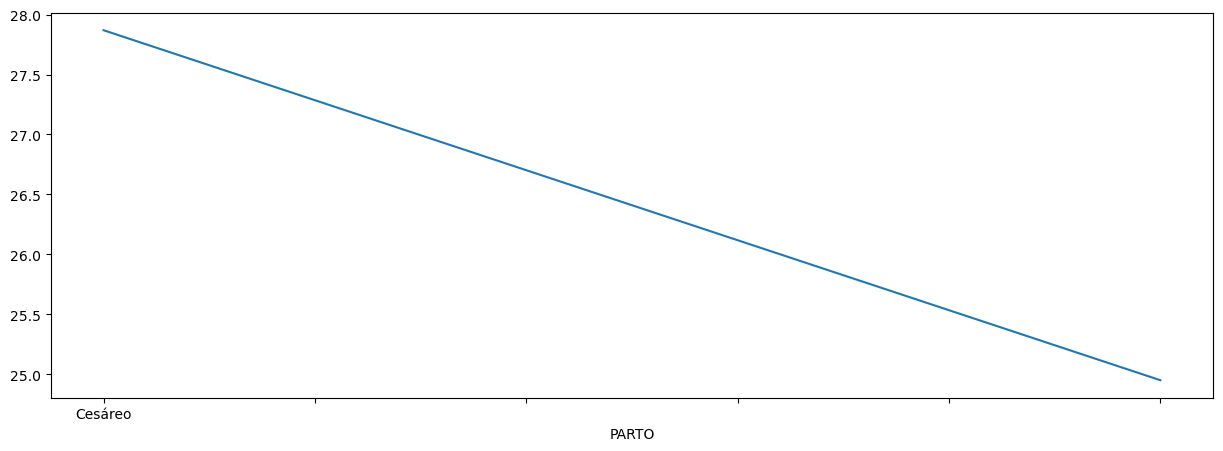

In [87]:
sinasc_6.groupby(["PARTO"])["IDADEMAE"].mean().plot(figsize=[15,5])

<Axes: xlabel='PARTO'>

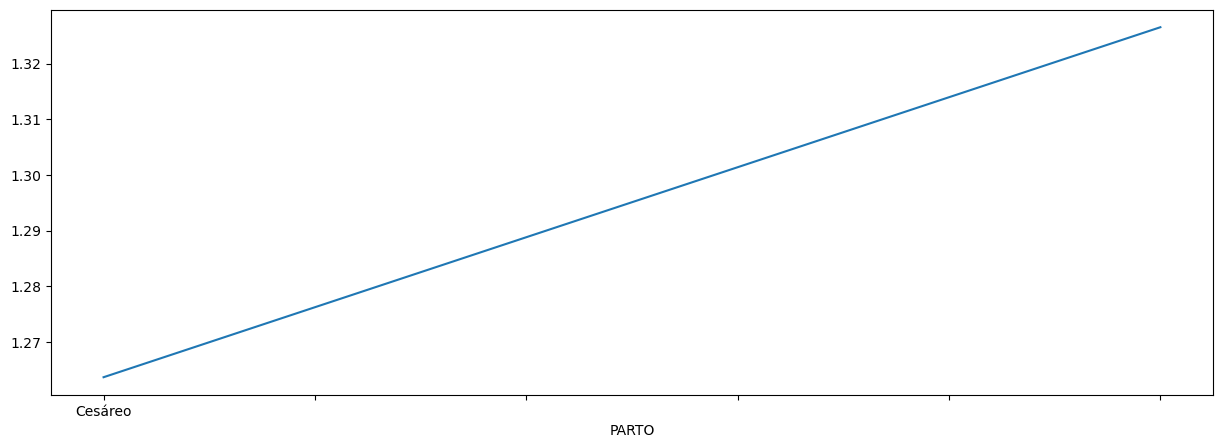

In [88]:
sinasc_6.groupby(["PARTO"])["Filhos vivos"].mean().plot(figsize=[15,5])

<Axes: xlabel='PARTO'>

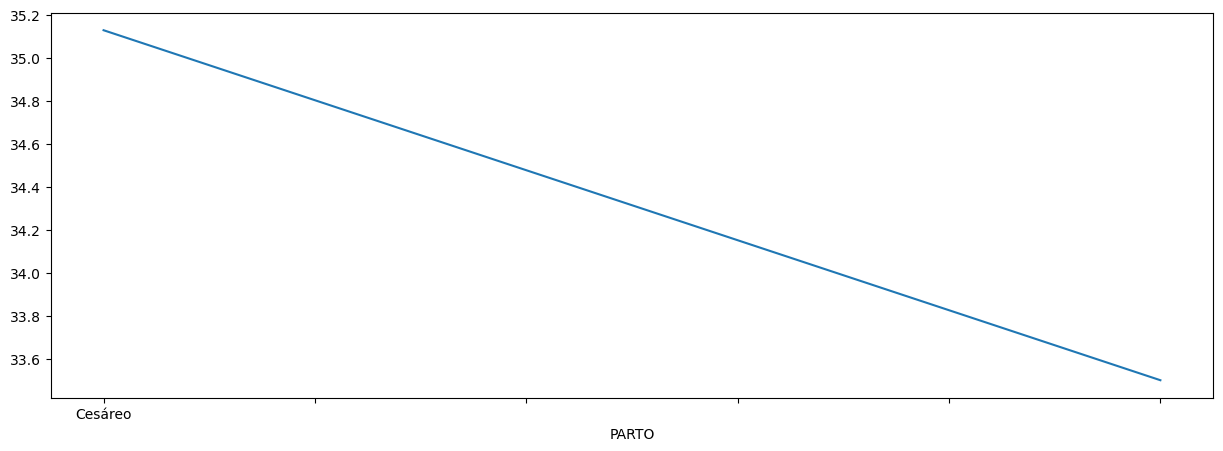

In [89]:
sinasc_6.groupby(["PARTO"])["IDADEPAI"].mean().plot(figsize=[15,5])

In [ ]:
print("Analisando os gráficos, do PARTO com relação a idade da mãe e com relação a idade do pai, conseguimos perceber que quanto mais velhos são os pais, no caso, quanto mais idade eles tiverem mais chances de ter o parto cesárea.")

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [11]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [12]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [13]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')